<a href="https://colab.research.google.com/github/jbinteam/010723305/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 1
- ความเข้าใจพื้นฐานเรื่องภาพดิจิตอลสำหรับวิชาการประมวลผลภาพ เช่น pixel color, image size, type of image
- การอ่านไฟล์ภาพ (read image file) มาเป็นข้อมูลดิจิตอล 

## แบบฝึกหัดที่ 1.1
**ภาพดิจิตอลก็คือข้อมูล array ของตัวเลขที่ถูกนำมาแสดงผลผ่านหน้าจอเท่านั้น** 
- รันโปรแกรมต่อไปนี้แล้วสังเกตุผล
- แก้ไขหรือเพิ่มเติมโค๊ดเพื่อให้ได้ผลลัพธ์ดังภาพที่กำหนด 

<img align="left" width="100" height="100" src="https://github.com/jbinteam/010723305/blob/main/images/week1_output_sample.png?raw=true">

In [ ]:
import numpy as np #เรียกใช้งาน library numpy โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ np
from PIL import Image #เรียกใช้งาน Image จาก library PIL
from matplotlib import pyplot as plt #เรียกใช้งาน pyplot จาก matplotlib โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ plt

data size: 30000
image size: (100, 100)


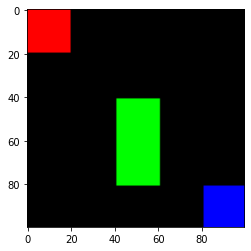

In [ ]:
width, height = 100, 100 #กำหนดขนาดของข้อมูล
data = np.zeros((height, width, 3), dtype=np.uint8) #สร้างตัวแปรที่ชื่อว่า data เพื่อเก็บค่าของตัวเลข

print("data size:",data.size)

data[0:20, 0:20] = [255, 0, 0]
data[41:81, 41:61] = [0, 255, 0]
data[81:100, 81:100] = [0, 0, 255]

img = Image.fromarray(data, 'RGB') #แปลงข้อมูลตัวเลขเป็นข้อมูลภาพประเภท RGB

print("image size:",img.size)

plt.imshow(img)
plt.show()

## แบบฝึกหัดที่ 1.2
ให้นักศึกษาสังเกตุผลลัพธ์จากการ run โค๊ดด้านล่างที่เป็นการนำข้อมูล array มาต่อกันก่อนที่จะแสดงผลแล้วตอบคำถามต่อไปนี้
- สังเกตุผลลัพธ์ที่ได้จากนำข้อมูลมาต่อกันด้วยฟังชันส์ *np.hstack((a,b))* แล้วตรวจสอบขนาดภาพ
- ลองเปลี่ยนคำสั่ง *np.hstack((a,b))* เป็น *np.vstack((a,b))* ตรวจสอบขนาดภาพอีกครั้ง

In [ ]:
stack_data=np.hstack((data,data))
# stack_data=np.vstack((data,data))

images = Image.fromarray(stack_data, 'RGB')

# print("stack images:",images.size)

plt.imshow(images)
plt.show()

## แบบฝึกหัดที่ 1.3
การ load ภาพตระกูล .jpg หรือ .png เข้ามาเป็นข้อมูลก่อนนำไปใช้ในการประมวลผล สามารถทำได้หลายวิธีขึ้นอยู่กับตัว library ที่เรียกใช้ ซึ่งแต่ละอันก็อาจจะให้ output จากการ load ข้อมูลภาพออกมาไม่เหมือนกัน สังเกตุจากโค๊ดตัวอย่างด้านล่างแล้วตอบคำถามต่อไปนี้
- การ load ภาพด้วย library จาก opencv และ load ภาพด้วย library จาก Pillow  ต่างกันหรือไม่ อย่างไรจงอธิบาย

(320, 480, 3)
72 28 35


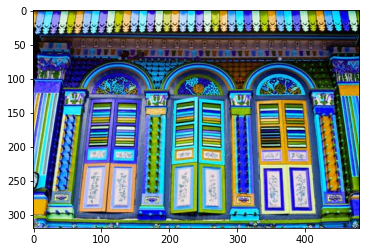

In [10]:
import cv2 # เรียกใช้งาน library ของ opencv

path = 'images/singapore-little-india.jpg' # ที่อยู่ของภาพต้องการจะ load

cv_img=cv2.imread(path) #load ข้อมูลภาพด้วย opencv

print(cv_img.shape)
#check pixel at [0,0] channel 0,1,2
print(cv_img[0][0][0],cv_img[0][0][1],cv_img[0][0][2])

plt.imshow(cv_img)
plt.show()

In [ ]:
pil_img=Image.open(path) #load ข้อมูลภาพด้วย pillow

#load ข้อมูล intensity สีของแต่ละ pixel
px = pil_img.load()

#แสดงค่า intensity ของสีใน pixel ตำแหน่ง [0,0] channel 0,1,2 
print(px[0,0])

plt.imshow(pil_img)
plt.show()

## แบบฝึกหัดที่ 1.4
การ load ภาพมาเป็นข้อมูลดิจิตอลสามารถเลือกผลลัพธ์ของการโหลดได้ว่าต้องการ output ของภาพอยู่ในชุดข้อมูลรูปแบบใด เช่น RGB, BGR, Grayscale
ดังแสดงในโค๊ดตัวอย่างด้านล่าง แล้วตอบคำถามดังต่อไปนี้ เมื่อ uncomment code ในหัวข้อย่อ 1.4.1 ถึง 1.4.4 หัวข้อใดยังสามารถทำงานได้หรือไม่ได้ เพราะอะไร


In [ ]:
gray_img=cv2.imread(path,cv2.IMREAD_GRAYSCALE) #load ข้อมูลเป็น grayscale
color_img=cv2.imread(path,cv2.IMREAD_COLOR) #load ข้อมูลเป็น color

#แสดงค่า　intensity สีของ pixel ตำแหน่งที่ [1,3] ของทั้ง 3 channel สี

# print(gray_img[0][0][0],gray_img[0][0][1],gray_img[0][0][2]) # 1.4.1

# print(gray_img.shape)
# print(color_img.shape)

#ทำการ stack data ก่อนนำมาแสดงผล
images=np.hstack((color_img,color_img)) # 1.4.2
# images=np.hstack((gray_img,gray_img)) # 1.4.3
# images=np.hstack((color_img,gray_img)) # 1.4.4

# images=cv2.cvtColor(images,cv2.COLOR_BGR2RGB) # ลองรันโปรแกรมแบบ　uncomment สลับกับ comment ในบรรทัดนี้ แล้วสังเกตุผล

#เลือกวิธีแสดงผลตามประเภทของข้อมูลที่โหลด
# plt.imshow(images) #แสดงผลเป็นสี
plt.imshow(images,'gray') #แสดงผลเป็น　grayscale
plt.show()